In [136]:
# import the necessary libraries
import warnings
import os
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D 
import keras.regularizers

**Load the images and the folder names as labels into arrays for further processing**

In [113]:
import cv2
images = []
labels = []
label_name = ''
image_count = 0
path = "C:/Users/Bhavik Parikh/Python/Computer Vision/Project 2/Data/" 

for label_name in range(0, 17):
  for img in os.listdir(path + str(label_name)):
    img = cv2.imread(path + str(label_name) + '/' + img)
    img = cv2.resize(img, (32,32))
    images.append(img)
    labels.append(label_name)
    image_count = image_count + 1
  print(label_name, image_count)
  image_count = 0

0 80
1 80
2 80
3 80
4 80
5 80
6 80
7 80
8 80
9 80
10 80
11 88
12 82
13 85
14 80
15 80
16 80


**Data Visualization**

**Display the normal image**

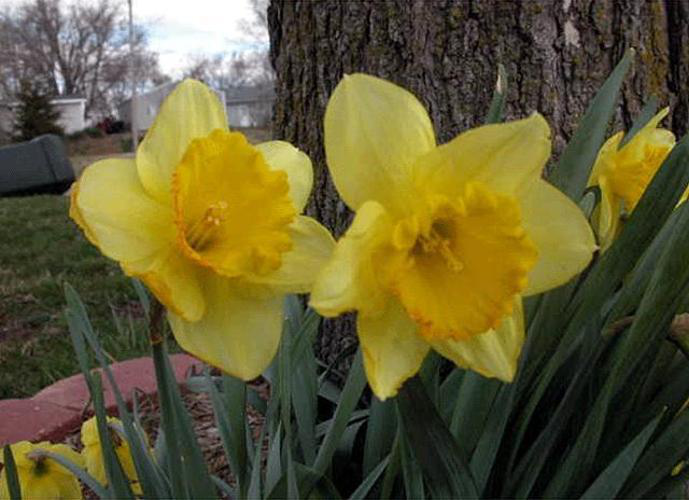

In [9]:
from PIL import Image, ImageFilter

#Read image
im = Image.open(path + '0/' + 'image_0001.jpg')

#Display image
im

**Apply the Blur filter and show the image**

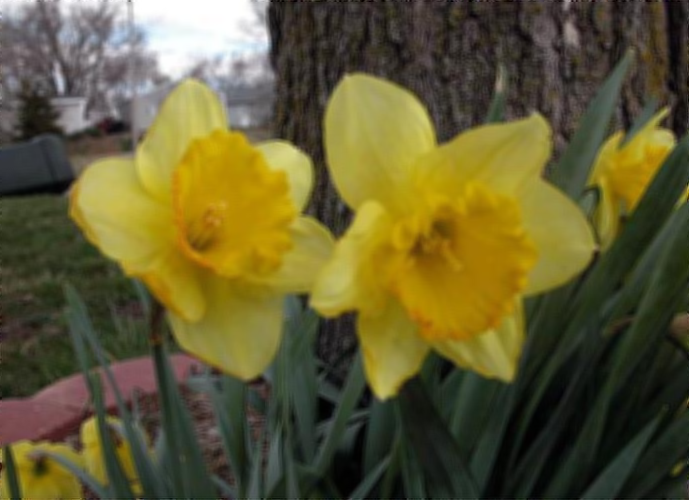

In [10]:
im_blur = im.filter( ImageFilter.BLUR )
im_blur

**Apply the Contour filter and show the image**

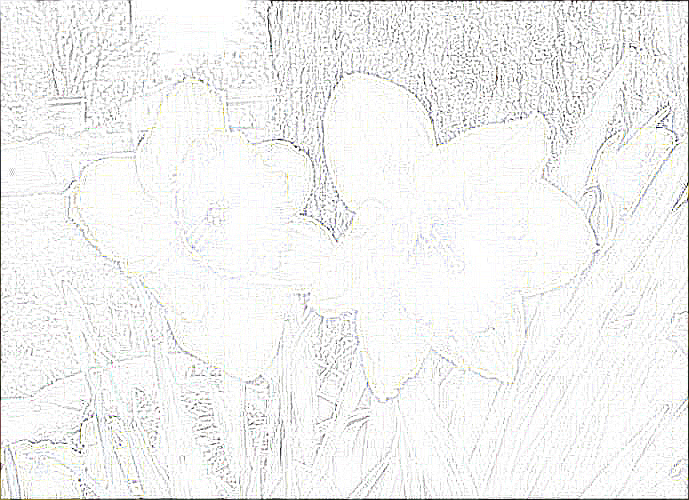

In [88]:
im_contour = im.filter( ImageFilter.CONTOUR )
im_contour

**Apply the Edge Detection filter and show the image**

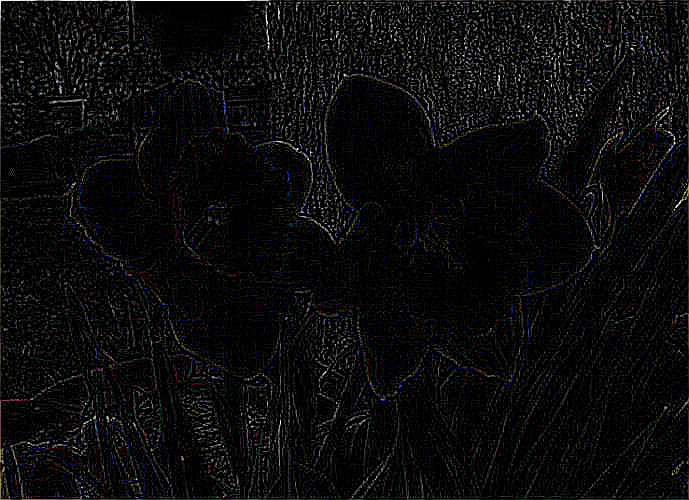

In [89]:
im_edges = im.filter( ImageFilter.FIND_EDGES )
im_edges

**Apply the Emboss filter and show the image**

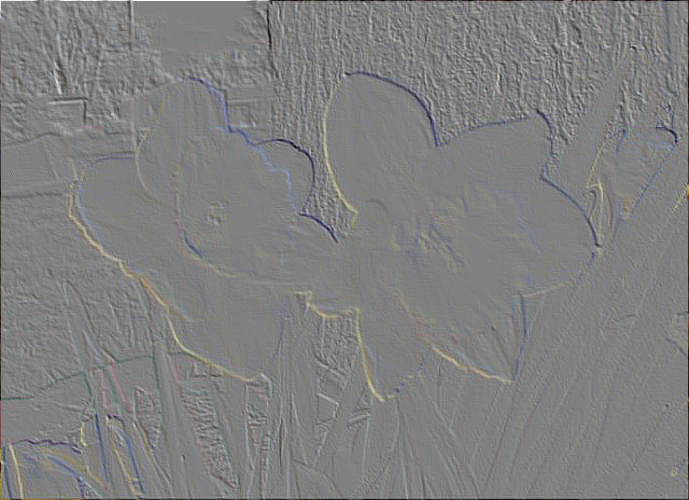

In [11]:
im_emboss = im.filter( ImageFilter.EMBOSS )
im_emboss

**Apply the Smooth filter and show the image**

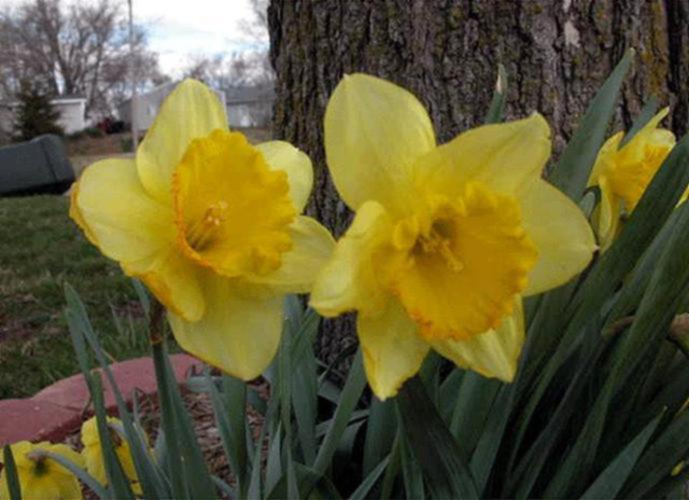

In [91]:
im_smooth = im.filter( ImageFilter.SMOOTH )
im_smooth

**Buld the Support Vector Classifier Supervised Learning Model to classify the images**

In [13]:
feature_list = []
for image in images:
  flat_features = image.flatten()
  feature_list.append(np.hstack(flat_features))

feature_matrix = np.array(feature_list)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# define standard scaler
sc = StandardScaler()

# run this on the feature matrix
sc_features = sc.fit_transform(feature_matrix)

pca = PCA(n_components=500)

# use fit_transform to run PCA on standardized matrix
pca_features = sc.fit_transform(sc_features)

**Convert labels list to numpy array**

In [15]:
svn_labels = np.array(labels)

**Train the Support Vector Classifier Model**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svn_X_train, svn_X_test, svn_y_train, svn_y_test = train_test_split(pca_features, svn_labels, test_size=.3, random_state=42)

from sklearn.svm import SVC

# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(svn_X_train, svn_y_train)

SVC(kernel='linear', probability=True, random_state=42)

**Evaluate the SVC Model**

In [17]:
# generate predictions
svn_y_pred = svm.predict(svn_X_test)

# calculate accuracy
accuracy = accuracy_score(svn_y_test, svn_y_pred)
print('SVC Model accuracy is: ', accuracy)

SVC Model accuracy is:  0.43825665859564167


As seen above, the model accuracy for the SVC supervised learning model is only 43%, as it is not able to identify lower level features during training. As a result Neural Network and CNN models are prefered and shown below

Data pre-processing for Neural Network and CNN Models

**Convert images list to numpy array**

In [114]:
images = np.array(images)

**Convert labels list to numpy array**

In [115]:
labels = np.array(labels)

**Shuffle the images and labels**

In [116]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

**Display a few images and their labels**

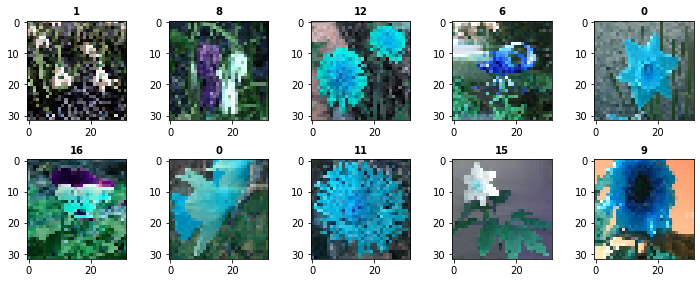

In [74]:
def plot_images(images, labels, num_row, num_col):
   
    fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
    for i in range(0,num_row * num_col):
        ax = axes[i//num_col, i%num_col]       
        ax.imshow(images[i], cmap="gray")
        ax.set_title(labels[i],weight='bold',fontsize=10)
    plt.tight_layout()    
    plt.show()

plot_images(images,labels, num_row=2, num_col=5)

**Split the data into train and test**

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [118]:
print("No. of images in X_train:", len(X_train))
print("No. of images in X_test:", len(X_test))
print("Shape of Image in X_train:", X_train[0].shape)
print("Shape of Image in X_test:", X_test[0].shape)
print("No. of labels in y_train:", len(y_train))
print("No. of labels in y_test:", len(y_test))

No. of images in X_train: 962
No. of images in X_test: 413
Shape of Image in X_train: (32, 32, 3)
Shape of Image in X_test: (32, 32, 3)
No. of labels in y_train: 962
No. of labels in y_test: 413


**Normalize the data by dividing by 255**

In [119]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

**One hot encode the labels for train and test data**

In [120]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=17)
y_test = to_categorical(y_test, num_classes=17)

**Build the Nueral Network Model**

In [31]:
tf.keras.backend.clear_session()

nn_model = Sequential()

nn_input_shape = (32,32,3)

nn_model.add(tf.keras.layers.Reshape((3072,),input_shape=nn_input_shape))

nn_model.add(Dropout(rate = 0.2))

nn_model.add(Dense(128, activation="elu", kernel_initializer="he_normal"))

nn_model.add(Dropout(rate = 0.2))

nn_model.add(Dense(64, activation="elu", kernel_initializer="he_normal"))

nn_model.add(Dropout(rate = 0.2))

nn_model.add(Dense(32, activation="elu", kernel_initializer="he_normal"))

nn_model.add(Dropout(rate = 0.2))

nn_model.add(Dense(17, activation="softmax"))

**Display the Nueral Network Model Summary**

In [32]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

**Compile the Neural Network Model**

In [33]:
nn_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

**Fit the Nueral Network Model**

In [35]:
nn_training_history = nn_model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
61/61 [==============================] - 1s 10ms/step - loss: 0.9711 - accuracy: 0.6778 - val_loss: 1.4844 - val_accuracy: 0.5109
Epoch 2/50
61/61 [==============================] - 1s 9ms/step - loss: 0.8850 - accuracy: 0.6840 - val_loss: 1.6103 - val_accuracy: 0.4843
Epoch 3/50
61/61 [==============================] - 0s 8ms/step - loss: 0.8394 - accuracy: 0.7131 - val_loss: 1.5269 - val_accuracy: 0.5133
Epoch 4/50
61/61 [==============================] - 1s 8ms/step - loss: 0.7950 - accuracy: 0.7318 - val_loss: 1.6259 - val_accuracy: 0.4891
Epoch 5/50
61/61 [==============================] - 1s 10ms/step - loss: 0.8240 - accuracy: 0.7193 - val_loss: 1.6931 - val_accuracy: 0.4455
Epoch 6/50
61/61 [==============================] - 1s 10ms/step - loss: 0.8337 - accuracy: 0.7214 - val_loss: 1.6908 - val_accuracy: 0.4891
Epoch 7/50
61/61 [==============================] - 1s 11ms/step - loss: 0.8291 - accuracy: 0.7225 - val_loss: 1.6045 - val_accuracy: 0.4915
Epoch 8/50
61/61

**Evaluate the Neural Network Model**

In [36]:
nn_test_score = nn_model.evaluate(X_test, y_test)
print('Test loss:', nn_test_score[0])
print('Test accuracy:', nn_test_score[1])

nn_train_score = nn_model.evaluate(X_train, y_train)
print('Trainig loss:', nn_train_score[0])
print('Trainig accuracy:', nn_train_score[1])

13/13 [==============================] - 0s 3ms/step - loss: 1.8964 - accuracy: 0.5036
Test loss: 1.896448016166687
Test accuracy: 0.5036319494247437
31/31 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.9802
Trainig loss: 0.0997631847858429
Trainig accuracy: 0.9802494645118713


The training accuracy is 98%, but the validation accuracy does not improve beyond 50%. Batch sizes of 16 and 32 were used. This means that the image features learned by the neural network layers with the training dataset are not good enough in classifying the images correctly with the validation or test data set and the model is highly over fitting.

**Build the CNN Model**

In [79]:
cnn_input_shape = (32,32,3)

num_classes = 17

cnn_model = Sequential() 

cnn_model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=cnn_input_shape))

cnn_model.add(MaxPooling2D())

cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2,2))) 

cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(256, activation="elu", kernel_initializer="he_normal", kernel_regularizer = keras.regularizers.l2(0.01))) 

cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(64, activation="elu", kernel_initializer="he_normal", kernel_regularizer = keras.regularizers.l2(0.01)))

cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(32, activation="elu", kernel_initializer="he_normal", kernel_regularizer = keras.regularizers.l2(0.01)))

cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(num_classes, activation='softmax'))

**Display CNN Model Summary**

In [80]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)             

**Compile the CNN Model**

In [81]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit the CNN Model and store the training history**

In [83]:
cnn_training_history = cnn_model.fit(X_train, y_train, batch_size=16, epochs=30, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
61/61 [==============================] - 2s 34ms/step - loss: 1.6979 - accuracy: 0.6237 - val_loss: 1.8084 - val_accuracy: 0.6271
Epoch 2/30
61/61 [==============================] - 2s 34ms/step - loss: 1.5198 - accuracy: 0.7069 - val_loss: 1.7625 - val_accuracy: 0.6271
Epoch 3/30
61/61 [==============================] - 2s 35ms/step - loss: 1.4886 - accuracy: 0.6892 - val_loss: 1.8760 - val_accuracy: 0.6005
Epoch 4/30
61/61 [==============================] - 2s 34ms/step - loss: 1.5013 - accuracy: 0.6902 - val_loss: 1.8531 - val_accuracy: 0.6029
Epoch 5/30
61/61 [==============================] - 2s 36ms/step - loss: 1.5851 - accuracy: 0.6819 - val_loss: 1.8104 - val_accuracy: 0.58351.5778 - accura
Epoch 6/30
61/61 [==============================] - 2s 38ms/step - loss: 1.5441 - accuracy: 0.6871 - val_loss: 1.8229 - val_accuracy: 0.6199
Epoch 7/30
61/61 [==============================] - 2s 36ms/step - loss: 1.4468 - accuracy: 0.6965 - val_loss: 1.8441 - val_accuracy: 0.564

**Evaluate the CNN model**

In [84]:
cnn_test_score = cnn_model.evaluate(X_test, y_test)
print('Test loss:', cnn_test_score[0])
print('Test accuracy:', cnn_test_score[1])

cnn_train_score = cnn_model.evaluate(X_train, y_train)
print('Training loss:', cnn_train_score[0])
print('Training accuracy:', cnn_train_score[1])

13/13 [==============================] - 0s 13ms/step - loss: 1.7743 - accuracy: 0.6610
Test loss: 1.7743499279022217
Test accuracy: 0.6610169410705566
31/31 [==============================] - 0s 12ms/step - loss: 0.9195 - accuracy: 0.9511
Training loss: 0.9195221066474915
Training accuracy: 0.9511434435844421


The best model in terms of training and test accuracy is the CNN model as shown above. The training accuracy is 95% and the test accuracy is 66%, which means that it is an overfit model. Batch sizes of 16 and 32 were used to compare the results**

## Apply transfer learning via ResNet50 model trained on imagenet dataset

In [125]:
#Importing the ResNet50 model
from keras.applications.resnet50 import ResNet50, preprocess_input

#Loading the ResNet50 model with pre-trained ImageNet weights
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [126]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [111]:
from skimage.transform import resize

In [129]:
#Reshaping the training data and naming is X_new 
X_new = np.array([resize(X_train[i], (224, 224, 3)) for i in range(0, len(X_train))]).astype('float32')

#Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model. 
X_new_enhanced = preprocess_input(X_new)

In [130]:
#Creating bottleneck features for the training data
train_features = resnet_model.predict(X_new_enhanced)

#Saving the bottleneck features
np.savez('resnet_features_train', features=train_features)

In [137]:
#sequential model with newly added fully connected layers that match the number of classes in the Cifar-10 dataset

resnet_model = Sequential()
resnet_model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(17, activation='softmax'))

In [138]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 17)                34833     
Total params: 34,833
Trainable params: 34,833
Non-trainable params: 0
_________________________________________________________________


In [139]:
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [141]:
resnet_model.fit(train_features, y_train, batch_size=32, epochs=30, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/30
25/25 [==============================] - 1s 21ms/step - loss: 2.8329 - accuracy: 0.0780 - val_loss: 2.8062 - val_accuracy: 0.1244
Epoch 2/30
25/25 [==============================] - 1s 21ms/step - loss: 2.8344 - accuracy: 0.0780 - val_loss: 2.7964 - val_accuracy: 0.1295
Epoch 3/30
25/25 [==============================] - 1s 23ms/step - loss: 2.8235 - accuracy: 0.0858 - val_loss: 2.8066 - val_accuracy: 0.0777
Epoch 4/30
25/25 [==============================] - 1s 27ms/step - loss: 2.8378 - accuracy: 0.0650 - val_loss: 2.7848 - val_accuracy: 0.1244
Epoch 5/30
25/25 [==============================] - 1s 20ms/step - loss: 2.8058 - accuracy: 0.0845 - val_loss: 2.7805 - val_accuracy: 0.1399
Epoch 6/30
25/25 [==============================] - 0s 19ms/step - loss: 2.8096 - accuracy: 0.0832 - val_loss: 2.7737 - val_accuracy: 0.1503
Epoch 7/30
25/25 [==============================] - 1s 24ms/step - loss: 2.8103 - accuracy: 0.0910 - val_loss: 2.7685 - val_accuracy: 0.0674
Epoch 8/30
25

## Evaluate the ResNet Model

In [144]:
rs_test_score = resnet_model.evaluate(train_features, y_train)
print('Training loss:', rs_test_score[0])
print('Training accuracy:', rs_test_score[1])

rs_test_score = resnet_model.evaluate(test_features, y_test)
print('Test loss:', rs_test_score[0])
print('Test accuracy:', rs_test_score[1])

31/31 [==============================] - 0s 10ms/step - loss: 2.6632 - accuracy: 0.2193
Training loss: 2.6632490158081055
Training accuracy: 0.21933472156524658


## As can be seen above, since the dataset is very different from imagenet, transfer learning from ResNet 50 model is not at all effective.

## Create a GUI to import the image “Prediction.jpg” and use the above CNN classification model to predict the class/label of this image, using tkinter module

In [107]:
# import necessary libraries

import tkinter as tk
from tkinter import ttk

window = tk.Tk()
window.title("Classifier GUI")

# Line 1 label

label = ttk.Label(window, text="File Name")
label.grid(row=0, column = 0, sticky=tk.W)

# Line 1 Input textbox

file_name = tk.StringVar()
file_name_textBox = ttk.Entry(window, width=16, textvariable = file_name)
file_name_textBox.grid(row=0, column=1)

# Import data function

def import_data():
    global pred_image
    fn = file_name.get()
    pred_path = "C:/Users/Bhavik Parikh/Python/Computer Vision/Project 2/Data/" 
    pred_image = cv2.imread(pred_path + fn)
    pred_image = cv2.resize(pred_image, (32,32))
    pred_image = np.expand_dims(pred_image, axis=0)

    pred_image = pred_image.astype('float32')
    pred_image /= 255
 
    # Line 1 Display textbox, which displays the confirmation on successful loading of image file

    confirm = "Data Imported"
    conf_entrybox = ttk.Entry(window, width=16)
    conf_entrybox.grid(row=0, column=3)
    conf_entrybox.insert(1,str(confirm))

# Line 1 Import data button

fn_button = ttk.Button(window, text ="Import Data", command = import_data)
fn_button.grid(row=0, column=2)

def predict_image_class():
    pred_image_class = cnn_model.predict(pred_image)
    pred_image_class_idx = np.argmax(pred_image_class, axis=1)
    
    # Line 2 Display textbox, which displays the predicted class

    conf_entrybox = ttk.Entry(window, width=16)
    conf_entrybox.grid(row=1, column=1)
    conf_entrybox.insert(1, str(pred_image_class_idx[0]))
    
# Line 2 label

label = ttk.Label(window, text="Image Class")
label.grid(row=1, column = 0, sticky=tk.W)

# Line 2 Predict class button

fn_button = ttk.Button(window, text ="Predict Class", command = predict_image_class)
fn_button.grid(row=1, column=2)

window.mainloop()

## Explain in depth your strategy to maintain and support the AIML image classifier after it in production.

The following 5 areas need to be looked at to maintain and support CNN image classifier after it is deployed in production:

1) Reproducibility

Creating reproducible pipelines and visible workflows for predictive modeling enables to easily understand the code and data used to generate results. The aspects to be included in reproducible pipelines are:

Data Collection
Data Pre-Processing
Feature Selection
Model Validation

2) Versioning

Machine learning models are extremely delicate and sensitive to change. Tiny incremental changes applied may cause the model performance to drop, making it useless at making predictions. That’s where versioning comes in. It not only helps retrace steps in case something happens to the model, but it also allows to ensure reproducibility. It’s recommended to implement versioning tools like Git for production models. 

3) Re-Training and Feature Re-Evaluation

It’s not only the model that needs to change dynamically. Feature engineering, extraction methods, and even the data sources being used can become less effective with time. All of these require constant monitoring and upkeep. For e.g. new images for a category or new image categories might have to be introduced in the model. When the offline model which is constantly being re-trained beats the current production model, a notification/alert for a human reviewer to review it and replace the model in production will be required.

4) Stress Testing and Data Edge-Case Testing

Ensure that the model’s performance and latency with higher volume (no. of images) is not impacted, by at least one additional order of magnitude than expected to encounter in production. This is needed when new images or image categories are required to be introduced. Ensure that the model falls gracefully and does not crash, by including edge case testing (e.g.it is being asked to predict an image which is not part of any existing category)

5) Model drift

It is crucial to monitor incoming data images to make sure the model is predicting based on the same image categories it has initially learned from. When the model is being re-trained for better performance, we have to ensure that no new categories are being introduced, else model performance will suffer.